In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Remove column with null values
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# Remove null values
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df.shape

(11239, 13)

In [13]:
# Change data type
df['Amount']=df['Amount'].astype(int)

In [14]:
df['Amount'].dtypes

dtype('int32')

In [15]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


EDA

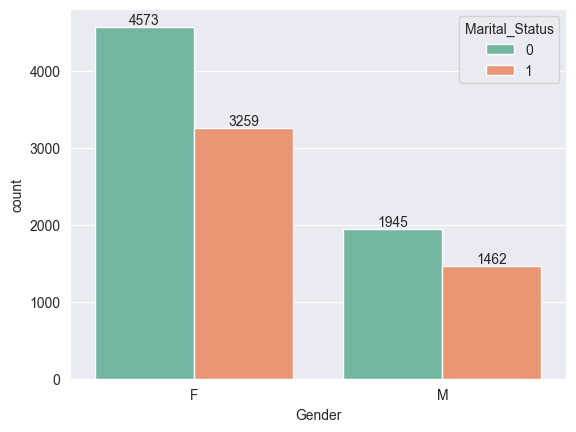

In [16]:
ax = sns.countplot(x = 'Gender',hue = "Marital_Status",palette = "Set2",data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


Text(0.5, 1.0, 'Sales by Gender')

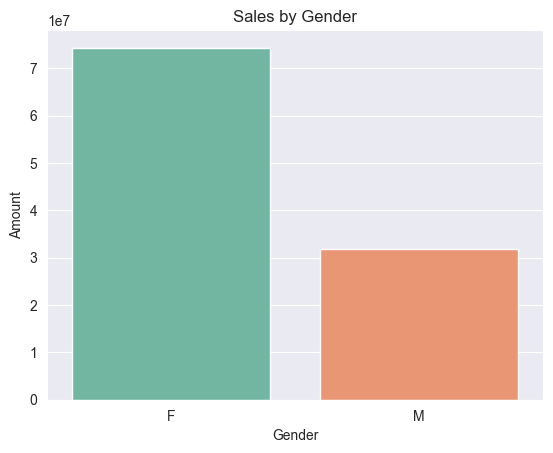

In [18]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Gender',y='Amount', palette = "Set2",data  = sales_gen).set_title("Sales by Gender")

From above graph we can conclude that most of the buyers are females

Age

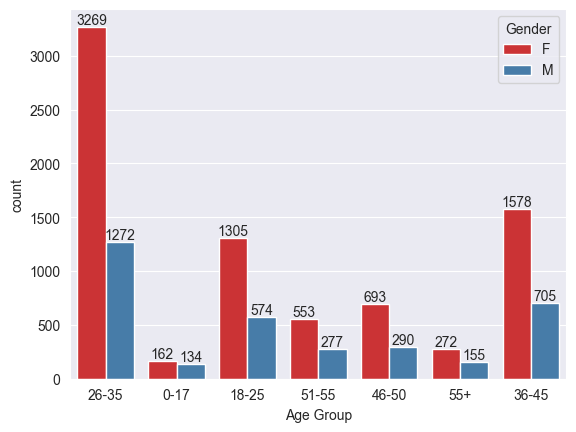

In [19]:
ax = sns.countplot(data = df, x= 'Age Group',hue = 'Gender',palette = 'Set1')
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Sales by Age Group')

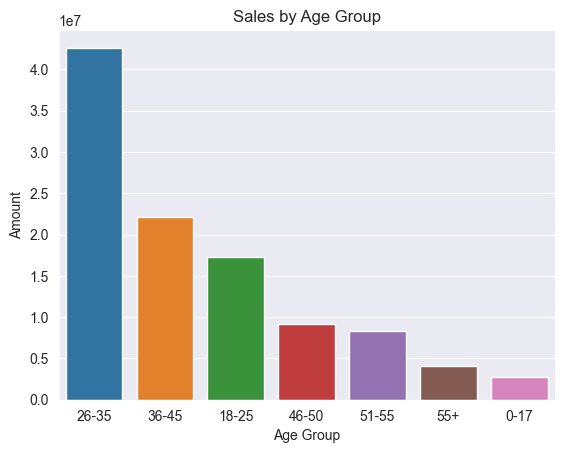

In [20]:
sales_Age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x = 'Age Group',y="Amount",data = sales_Age).set_title("Sales by Age Group")

From above graphs we conclude that people with age group in between 26-35 buys more comparetively to others

State

In [21]:
sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


Text(0.5, 1.0, 'Order by State')

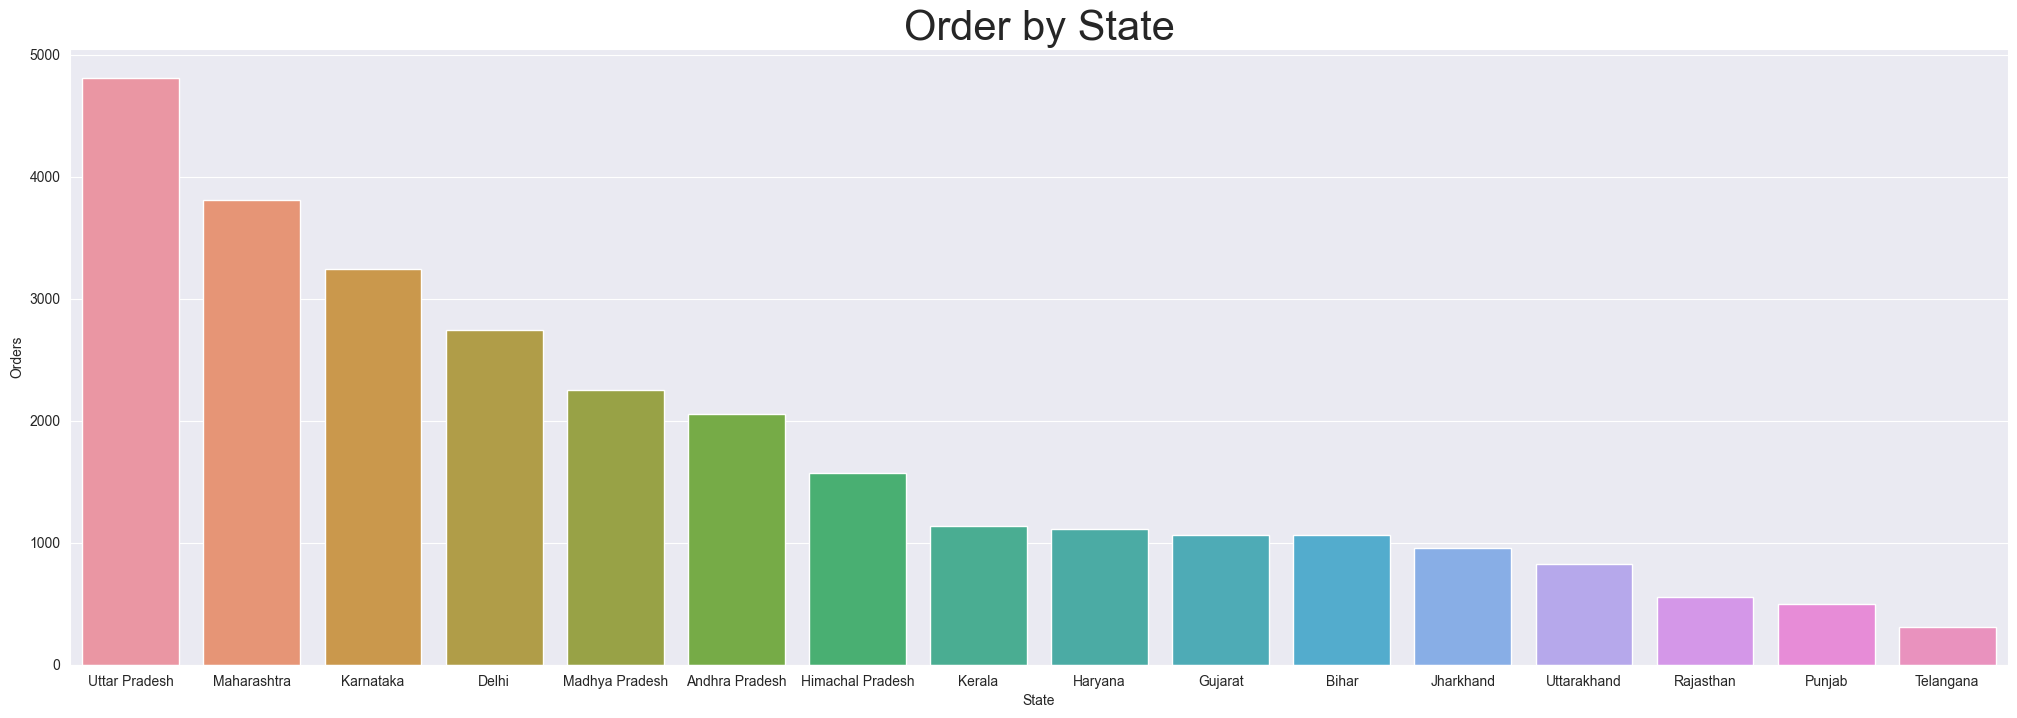

In [22]:
plt.figure(figsize = (25,8))
sns.barplot(data = sales_state,x = 'State',y='Orders').set_title("Order by State",fontdict = { 'fontsize': 30})

Above graph shows order numbers by state

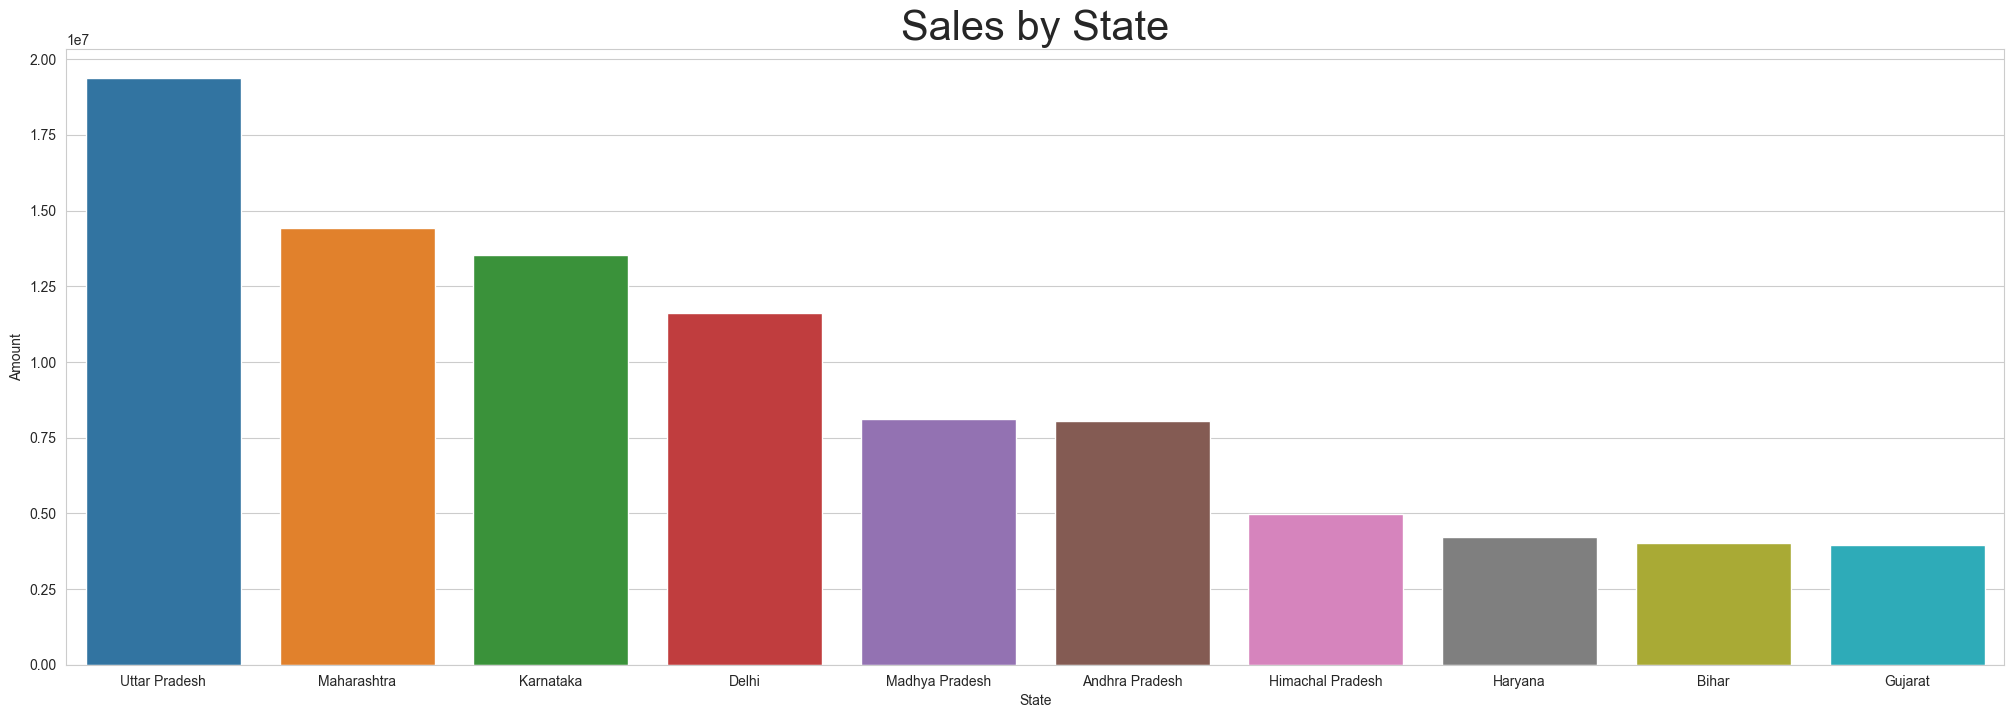

In [23]:
sales_state1 = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
plt.figure(figsize = (25,8))
sns.set_style('whitegrid')
sns.barplot(data = sales_state1,x = 'State',y='Amount').set_title("Sales by State",fontdict = { 'fontsize': 30})
sns.set()

Above graph shows purchasing by states

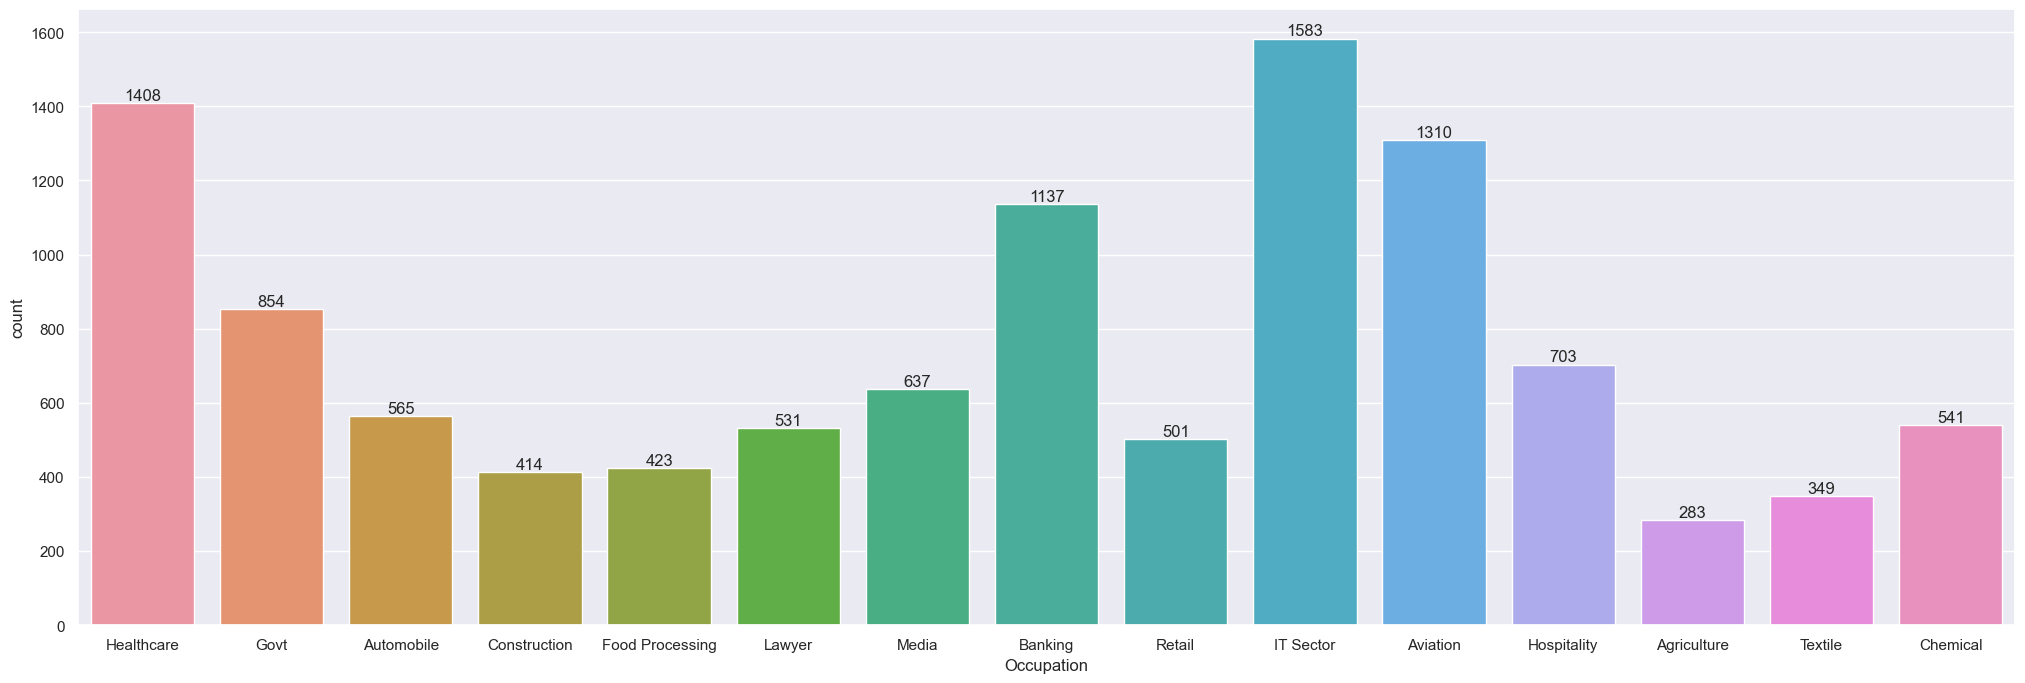

In [24]:
plt.figure(figsize = (25,8))
ax = sns.countplot(x = 'Occupation', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [41]:
sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sales_occ.reset_index(drop  =True,inplace = True)
sales_occ

,Occupation,Amount
0,IT Sector,14755079
1,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
4,Govt,8517212
5,Hospitality,6376405
6,Media,6295832
7,Automobile,5368596
8,Chemical,5297436
9,Lawyer,4981665


Text(0.5, 1.0, 'Sales By Occupation')

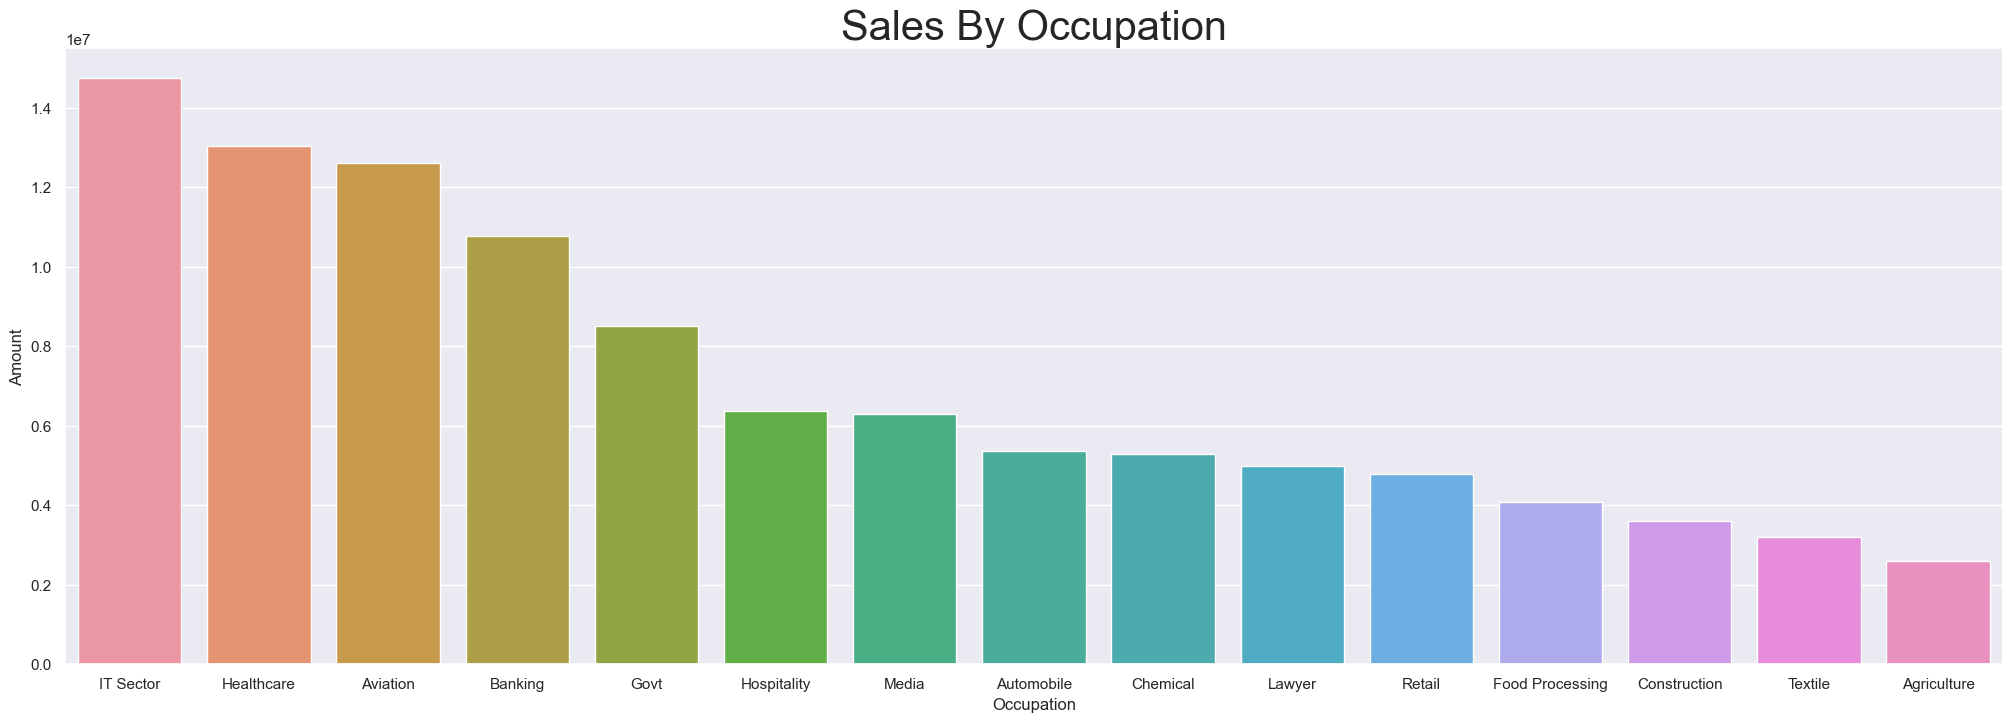

In [42]:
plt.figure(figsize = (25,8))
sns.barplot(data = sales_occ ,x = 'Occupation',y='Amount').set_title("Sales By Occupation",fontdict = {'fontsize':30})

From above we conclude that most of the buyers are from IT Sector.

Product Category

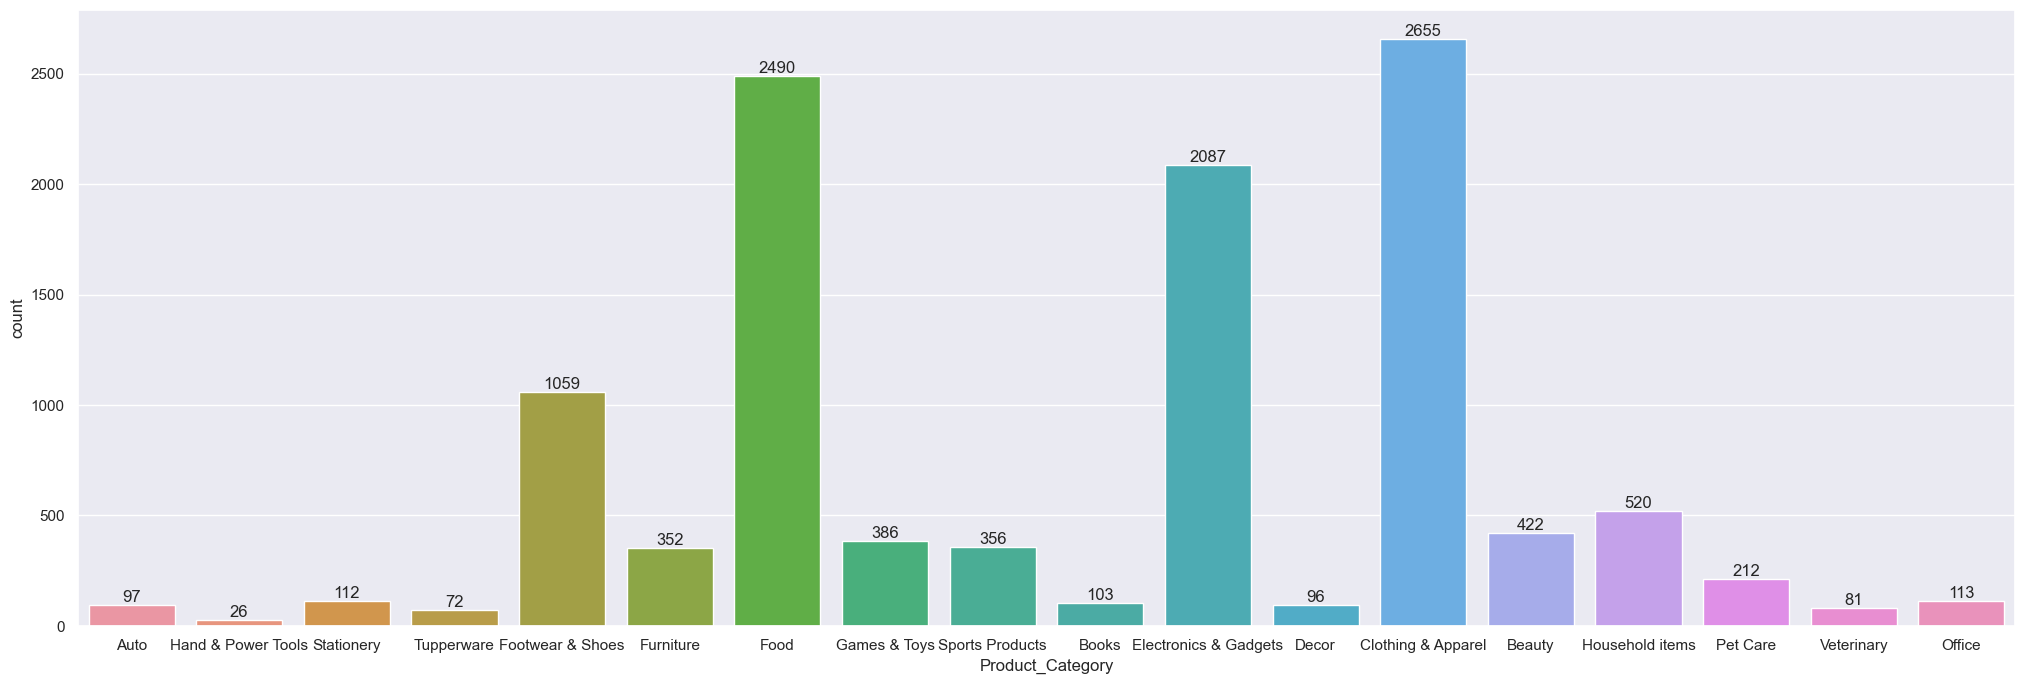

In [40]:
plt.figure(figsize = (25,8))
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

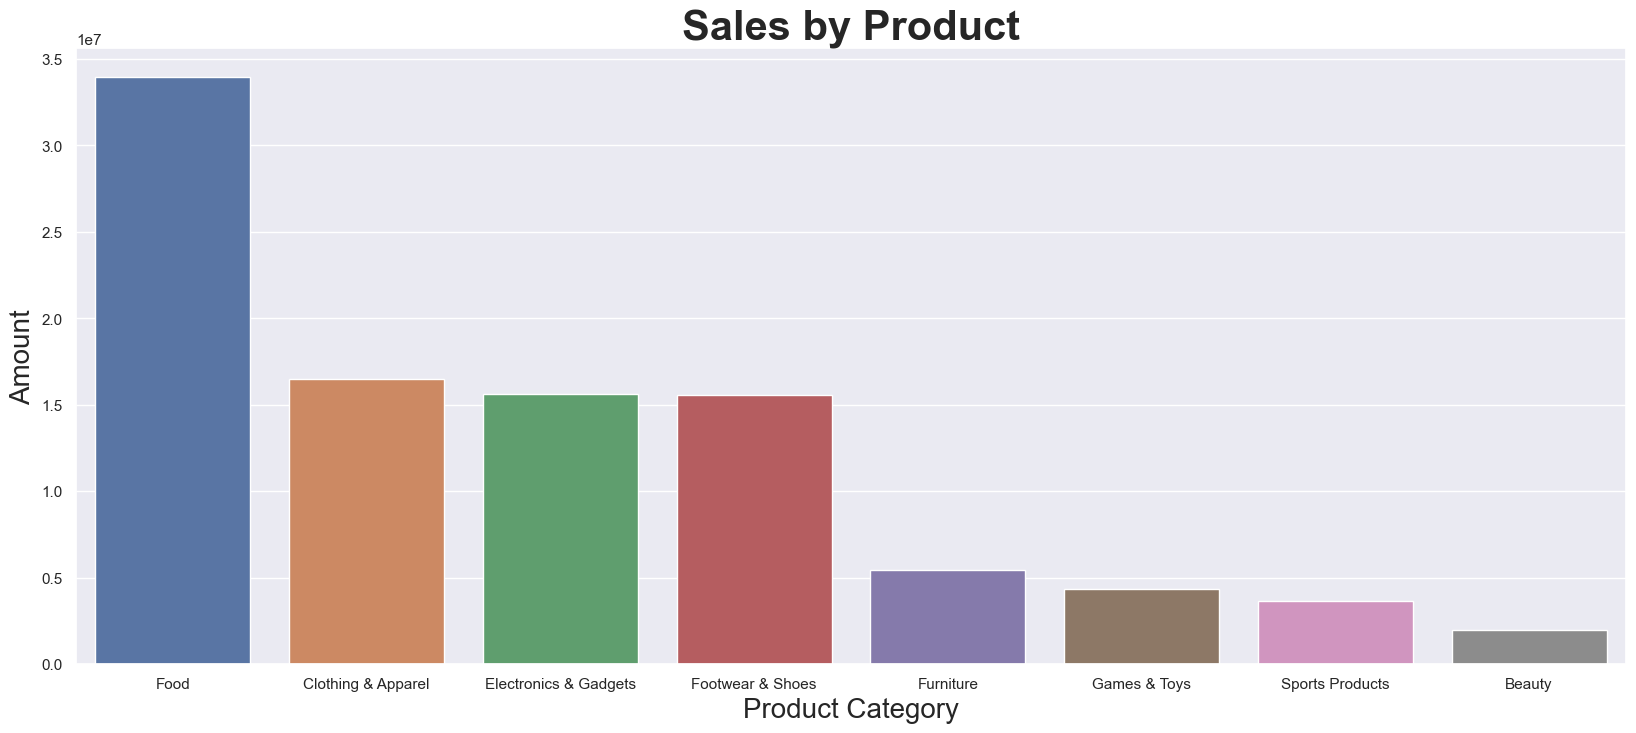

In [70]:
plt.figure(figsize = (20,8))
sales_prod = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(8)
fig = sns.barplot(x = 'Product_Category',y='Amount',data = sales_prod)
fig.set_xlabel("Product Category",fontdict = {'fontsize':20})
fig.set_ylabel("Amount",fontdict = {'fontsize':20})
fig.set_title("Sales by Product",fontdict = {'fontsize':30, 'weight':'bold'})
plt.show()

Above graph shoes most of the sold products are from Food, clothing & apparel